# Part I Project

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_olivetti_faces
%matplotlib inline

## Fetch, Preview, and Explore the Data

In [2]:
X, y = fetch_olivetti_faces(return_X_y=True)

def inspect_data(X, y, show_data=False):
    print("Data X shape: ", X.shape)
    print("Labels y shape: ", y.shape)
    if show_data:
        print("Dataset X:\n", X)
        print("Labels y: \n", y)

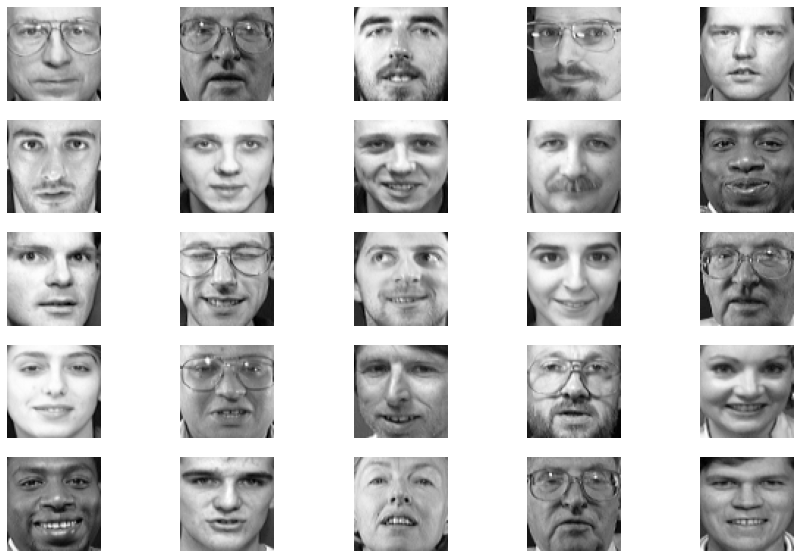

In [3]:
def preview_faces(X, num_of_images_divided_by_2):
    plt.figure(figsize=(15, 10))
    counter = 0
    shuffled_idx = np.random.permutation(len(X))
    X_copy = X.copy()
    for index, X_image in enumerate(X_copy[shuffled_idx]):
        plt.subplot(num_of_images_divided_by_2 // 10, 5, index + 1)
        plt.imshow(X_image.reshape(64, 64), cmap="gray")
        plt.axis('off')
        if (counter == num_of_images_divided_by_2/2 - 1):
            break
        counter += 1
plt.show()
preview_faces(X, 50)

## Data Preprocessing

In [4]:
# Methods:

# most promising: Dimensionality Reduction/Feature Removals

# things to test out:

# PCA/IPCA/kPCA/MDS/Isomap/LDA/t-SNE/LLE/Random Proj.
# KMeans, DBSCAN, Agglomerative, Spectral, Mean-shift, affinity prop, BIRCH

# Classifiers:

# Softmax/SGD/SVC/LinearSVC/DT/Ensemble/KNeighbors

In [5]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict, learning_curve, validation_curve
from sklearn.pipeline import Pipeline

from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score, precision_recall_curve, roc_curve

from sklearn.decomposition import PCA, IncrementalPCA, KernelPCA
from sklearn.manifold import TSNE, LocallyLinearEmbedding, MDS, Isomap
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.random_projection import GaussianRandomProjection, SparseRandomProjection

from sklearn.cluster import KMeans, DBSCAN, AffinityPropagation, AgglomerativeClustering, Birch, MeanShift, SpectralClustering
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, VotingClassifier, StackingClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

In [6]:
inspect_data(X, y, True)

Data X shape:  (400, 4096)
Labels y shape:  (400,)
Dataset X:
 [[0.30991736 0.3677686  0.41735536 ... 0.15289256 0.16115703 0.1570248 ]
 [0.45454547 0.47107437 0.5123967  ... 0.15289256 0.15289256 0.15289256]
 [0.3181818  0.40082645 0.49173555 ... 0.14049587 0.14876033 0.15289256]
 ...
 [0.5        0.53305787 0.607438   ... 0.17768595 0.14876033 0.19008264]
 [0.21487603 0.21900827 0.21900827 ... 0.57438016 0.59090906 0.60330576]
 [0.5165289  0.46280992 0.28099173 ... 0.35950413 0.3553719  0.38429752]]
Labels y: 
 [ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2
  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4
  4  4  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9  9  9 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 14 14 14 14
 14 14 14 14 14 14 15 15 15 15 15 15 15 15 

In [7]:
# splitting the data

olivetti = fetch_olivetti_faces()

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42)
train_valid_idx, test_idx = next(strat_split.split(olivetti.data, olivetti.target))
X_train_valid = olivetti.data[train_valid_idx]
y_train_valid = olivetti.target[train_valid_idx]
X_test = olivetti.data[test_idx]
y_test = olivetti.target[test_idx]

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=43)
train_idx, valid_idx = next(strat_split.split(X_train_valid, y_train_valid))
X_train = X_train_valid[train_idx]
y_train = y_train_valid[train_idx]
X_valid = X_train_valid[valid_idx]
y_valid = y_train_valid[valid_idx]

In [8]:
inspect_data(X_train, y_train)
inspect_data(X_valid, y_valid)
inspect_data(X_test, y_test)

Data X shape:  (280, 4096)
Labels y shape:  (280,)
Data X shape:  (80, 4096)
Labels y shape:  (80,)
Data X shape:  (40, 4096)
Labels y shape:  (40,)


In [9]:
log_reg = LogisticRegression()
sgd_clf = SGDClassifier()
lin_svc = LinearSVC()
svc = SVC()
tree_clf = DecisionTreeClassifier()
rnd_forest_clf = RandomForestClassifier()
extra_trees_clf = ExtraTreesClassifier()
adaboost_clf = AdaBoostClassifier()
# gradientboost_clf = GradientBoostingClassifier()
bagging_clf = BaggingClassifier()
neighbors_clf = KNeighborsClassifier()
mlp_clf = MLPClassifier()

classifiers = (log_reg, 
               sgd_clf, 
               lin_svc, 
               svc, 
               tree_clf, 
               rnd_forest_clf, 
               extra_trees_clf,
               adaboost_clf,
               # gradientboost_clf,
               bagging_clf,
               neighbors_clf,
               mlp_clf)

xgboost_clf = XGBClassifier()

# voting_clf = VotingClassifier()
# stacking_clf = StackingClassifier()

In [10]:
shortlist_models = False
if shortlist_models:
    accuracy = []
    for classifier in classifiers:
        classifier_accuracy = cross_val_score(classifier, X_train, y_train, scoring="accuracy", cv=5,
                                              n_jobs=-1, verbose=2)
        print(str(classifier))
        accuracy.append((str(classifier), classifier_accuracy))

In [11]:
# accuracy

In [12]:
# mean_median_scores = []
# for classifier, scores in accuracy:
#     mean_median_scores.append((str(classifier), np.mean(scores), np.median(scores)))

In [13]:
# mean_median_scores

In [14]:
# LogisticRegression
# LinearSVC
# RandomForestClassifier
# ExtraTreesClassifier

In [15]:
# LogisticRegression

# 1st searchCV
run_GridSearchCV1_log_reg = False
if run_GridSearchCV1_log_reg:
    param_grid_log_reg = [{"penalty": ["l1", "l2", "elasticnet", None],
                   "tol": [1e-0, 1e-1, 1e-2, 1e-3, 1e-4],
                   "C": [1.0, 10.0, 100.0],
                   "l1_ratio": np.round(np.linspace(0, 1, 10), 1)}
                 ]

    grid_cv_log_reg = GridSearchCV(log_reg, param_grid_log_reg, cv=5, scoring="accuracy", n_jobs=-1, verbose=2)
    grid_cv_log_reg.fit(X_train, y_train)

In [16]:
# grid_cv.best_params_

In [17]:
best_params_log_reg1 = {'C': 10.0, 'l1_ratio': 0.0, 'penalty': 'l2', 'tol': 0.01}

In [18]:
# 2nd searchCV
run_GridSearchCV2_log_reg = False
if run_GridSearchCV2_log_reg:
    param_grid_log_reg = [{"tol": np.linspace(0.01, 0.1, 10),
                   "C": [10.0, 32, 55.0]}
                 ]

    grid_cv_log_reg = GridSearchCV(LogisticRegression(**best_params_log_reg1), param_grid_log_reg, cv=5, scoring="accuracy", n_jobs=-1, verbose=2)
    grid_cv_log_reg.fit(X_train, y_train)

In [19]:
# grid_cv_log_reg.best_params_

In [20]:
best_params_log_reg2 = {'C': 10.0, 'penalty': 'l2', 'tol': 0.01}

In [21]:
log_reg_optimized = LogisticRegression(**best_params_log_reg2)
log_reg_optimized.fit(X_train, y_train)
log_reg_pred = log_reg_optimized.predict(X_valid)
print(accuracy_score(y_valid, log_reg_pred)) # 96.25%

0.9625


C:\Users\VTSB\anaconda3\envs\learningMLvenv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [22]:
# LinearSVC

# 1st searchCV
run_GridSearchCV1_lin_svc = False
if run_GridSearchCV1_lin_svc:
    param_grid_lin_svc = [{"penalty": ["l1", "l2"],
                           "loss": ["hinge", "squared_hinge"],
                           "tol": [1e-0, 1e-1, 1e-2, 1e-3, 1e-4],
                           "C": [1.0, 10.0, 100.0]}
                         ]

    grid_cv_lin_svc = GridSearchCV(lin_svc, param_grid_lin_svc, cv=5, scoring="accuracy", n_jobs=-1, verbose=2)
    grid_cv_lin_svc.fit(X_train, y_train)

In [23]:
# grid_cv_lin_svc.best_params_

In [24]:
best_params_lin_svc1 = {'C': 10.0, 'loss': 'squared_hinge', 'penalty': 'l2', 'tol': 0.001}

In [25]:
# 2nd searchCV
run_GridSearchCV2_lin_svc = False
if run_GridSearchCV2_lin_svc:
    param_grid_lin_svc = [{"tol": np.linspace(0.001, 0.01, 10),
                           "C": [10.0, 32, 55.0]}
                         ]

    grid_cv_lin_svc = GridSearchCV(LinearSVC(**best_params_lin_svc1), param_grid_lin_svc, cv=5, scoring="accuracy", n_jobs=-1, verbose=2)
    grid_cv_lin_svc.fit(X_train, y_train)

In [26]:
# grid_cv_lin_svc.best_params_

In [27]:
best_params_lin_svc2 = {'C': 10.0, 'tol': 0.004, 'loss': 'squared_hinge', 'penalty': 'l2'}

In [28]:
# 3rd searchCV
run_GridSearchCV3_lin_svc = False
if run_GridSearchCV3_lin_svc:
    param_grid_lin_svc = [{"tol": np.linspace(0.004, 0.005, 11)}]

    grid_cv_lin_svc = GridSearchCV(LinearSVC(**best_params_lin_svc2), param_grid_lin_svc, cv=5, scoring="accuracy", n_jobs=-1, verbose=2)
    grid_cv_lin_svc.fit(X_train, y_train)

In [29]:
# grid_cv_lin_svc.best_params_

In [30]:
best_params_lin_svc3 = {'C': 10.0, 'tol': 0.004, 'loss': 'squared_hinge', 'penalty': 'l2'}

In [31]:
lin_svc_optimized = LinearSVC(**best_params_lin_svc3)
lin_svc_optimized.fit(X_train, y_train)
lin_svc_pred = lin_svc_optimized.predict(X_valid)
print(accuracy_score(y_valid, lin_svc_pred)) # 97.50%

0.975


C:\Users\VTSB\anaconda3\envs\learningMLvenv\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [32]:
# RandomForestClassifier

# 1st searchCV
run_GridSearchCV1_rnd_clf = False
if run_GridSearchCV1_rnd_clf:
    param_grid_rnd_clf = [{"n_estimators": [50, 100, 150, 200, 250, 300],
                           "criterion": ["gini", "entropy"],
                           "max_depth": [10, 100, 1000, None],
                           "min_samples_split": [2, 4, 6, 8, 10]}
                         ]

    grid_cv_rnd_clf = GridSearchCV(rnd_forest_clf, param_grid_rnd_clf, cv=5, scoring="accuracy", n_jobs=-1, verbose=2)
    grid_cv_rnd_clf.fit(X_train, y_train)

In [33]:
# grid_cv_rnd_clf.best_params_

In [34]:
best_params_rnd_clf1 = {'criterion': 'gini',
                        'max_depth': None,
                        'min_samples_split': 4,
                        'n_estimators': 300}

In [35]:
# 2nd searchCV
run_GridSearchCV2_rnd_clf = False
if run_GridSearchCV2_rnd_clf:
    param_grid_rnd_clf = [{"n_estimators": [300, 400, 500, 600, 700, 800],
                           "min_samples_split": [2, 3, 4, 5, 6],
                           "min_samples_leaf": [1, 5, 10, 20, 30, 50],
#                            "max_features": ["auto", "sqrt", "log2", None],
#                            "max_leaf_nodes": [10, 20, 50, None],
#                            "bootstrap": [True, False],
#                            "max_samples": [None, *np.linspace(0, 1, 11)[1:10]]
                          }
                         ]

    grid_cv_rnd_clf = GridSearchCV(RandomForestClassifier(**best_params_rnd_clf1), 
                                   param_grid_rnd_clf, cv=5, scoring="accuracy", n_jobs=-1, 
                                   verbose=2)
    grid_cv_rnd_clf.fit(X_train, y_train)

In [36]:
# grid_cv_rnd_clf.best_params_

In [37]:
best_params_rnd_clf2 = {'min_samples_leaf': 1, 
                        'min_samples_split': 4, 
                        'n_estimators': 600,
                        'criterion': 'gini',
                        'max_depth': None}

In [38]:
# 3rd searchCV
run_GridSearchCV3_rnd_clf = False
if run_GridSearchCV3_rnd_clf:
    param_grid_rnd_clf = [{
                           "max_features": ["auto", "sqrt", "log2", None],
                           "max_leaf_nodes": [10, 20, 50, None],
                           "bootstrap": [True, False],
                           # "max_samples": [None, *np.round(np.linspace(0, 1, 11)[1:10], 3)]
                          }
                         ]

    grid_cv_rnd_clf = GridSearchCV(RandomForestClassifier(**best_params_rnd_clf2), 
                                   param_grid_rnd_clf, cv=5, scoring="accuracy", n_jobs=-1, 
                                   verbose=2)
    grid_cv_rnd_clf.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   32.0s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed: 75.6min finished


In [41]:
# grid_cv_rnd_clf.best_params_

{'bootstrap': True, 'max_features': 'auto', 'max_leaf_nodes': 50}

In [43]:
best_params_rnd_clf3 = {'bootstrap': True, 
                        'max_features': 'auto', 
                        'max_leaf_nodes': 50,
                        'min_samples_leaf': 1, 
                        'min_samples_split': 4, 
                        'n_estimators': 600,
                        'criterion': 'gini',
                        'max_depth': None}

In [44]:
rnd_clf_optimized = RandomForestClassifier(**best_params_rnd_clf3)
rnd_clf_optimized.fit(X_train, y_train)
rnd_clf_optimized_pred = rnd_clf_optimized.predict(X_valid)
print(accuracy_score(y_valid, rnd_clf_optimized_pred))

0.925


In [46]:
# ExtraTreesClassifier

# 1st searchCV
run_GridSearchCV1_extra_trees_clf = False
if run_GridSearchCV1_extra_trees_clf:
    param_grid_extra_trees_clf = [{"n_estimators": [50, 100, 150, 200, 250, 300],
                           "criterion": ["gini", "entropy"],
                           "max_depth": [10, 100, 1000, None],
                           # "min_samples_split": [2, 4, 6, 8, 10]
                                  }
                         ]

    grid_cv_extra_trees_clf = GridSearchCV(extra_trees_clf, param_grid_extra_trees_clf, cv=5, scoring="accuracy", n_jobs=-1, verbose=2)
    grid_cv_extra_trees_clf.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   37.5s finished


In [47]:
# grid_cv_extra_trees_clf.best_params_

{'criterion': 'gini', 'max_depth': 100, 'n_estimators': 300}

In [51]:
best_params_extra_trees_clf1 = {'criterion': 'gini', 'max_depth': 100, 'n_estimators': 300}

In [52]:
# 2nd searchCV
run_GridSearchCV2_extra_trees_clf = False
if run_GridSearchCV2_extra_trees_clf:
    param_grid_extra_trees_clf = [{"n_estimators": [275, 300, 325, 350, 375, 400],
                                   "min_samples_split": [2, 4, 6, 8, 10]
                                  }
                                 ]

    grid_cv_extra_trees_clf = GridSearchCV(ExtraTreesClassifier(**best_params_extra_trees_clf1), param_grid_extra_trees_clf, cv=5, scoring="accuracy", n_jobs=-1, verbose=2)
    grid_cv_extra_trees_clf.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   40.7s finished


In [53]:
# grid_cv_extra_trees_clf.best_params_

{'min_samples_split': 6, 'n_estimators': 300}

In [54]:
best_params_extra_trees_clf2 = {'min_samples_split': 6, 
                                'n_estimators': 300,
                                'criterion': 'gini', 
                                'max_depth': 100, 
                                }

In [56]:
extra_trees_clf_optimized = ExtraTreesClassifier(**best_params_extra_trees_clf2)
extra_trees_clf_optimized.fit(X_train, y_train)
extra_trees_clf_optimized_pred = extra_trees_clf_optimized.predict(X_valid)
print(accuracy_score(y_valid, extra_trees_clf_optimized_pred))

0.9625


In [58]:
extra_trees_clf_optimized = ExtraTreesClassifier(max_depth=100, min_samples_split= 6, n_estimators= 300)
extra_trees_clf_optimized.fit(X_train, y_train)
extra_trees_clf_optimized_pred = extra_trees_clf_optimized.predict(X_valid)
print(accuracy_score(y_valid, extra_trees_clf_optimized_pred))

0.9625


In [72]:
feature_importances = pd.Series(grid_cv_extra_trees_clf.best_estimator_.feature_importances_)
feature_importances.nlargest(500)

18      0.001829
84      0.001539
19      0.001437
149     0.001410
14      0.001405
          ...   
134     0.000432
142     0.000432
287     0.000431
3614    0.000431
348     0.000431
Length: 500, dtype: float64

In [73]:
# Testing XGBClassifier

xgb_classifier = XGBClassifier()
xgb_accuracy = cross_val_score(xgb_classifier, X_train, y_train, scoring="accuracy", cv=5,
                                              n_jobs=-1, verbose=2)
xgb_accuracy

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   46.0s remaining:  1.2min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   46.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   46.3s finished


array([0.73214286, 0.71428571, 0.73214286, 0.73214286, 0.75      ])

+ **testing dataset size**

In [77]:
# Experimenting with Dataset Size

X_train_exp, X_test_exp, y_train_exp, y_test_exp = train_test_split(X, y, random_state=12, test_size=0.2)

lin_svc_optimized_exp = LinearSVC(**best_params_lin_svc3)
lin_svc_optimized_exp.fit(X_train_exp, y_train_exp)

C:\Users\VTSB\anaconda3\envs\learningMLvenv\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=10.0, tol=0.004)

In [79]:
lin_svc_optimized_exp_pred = lin_svc_optimized_exp.predict(X_test_exp)
print(accuracy_score(y_test_exp, lin_svc_optimized_exp_pred))

0.9625


In [81]:
extra_trees_clf_exp = ExtraTreesClassifier(**best_params_extra_trees_clf2)
extra_trees_clf_exp.fit(X_train_exp, y_train_exp)
extra_trees_clf_exp_pred = extra_trees_clf_exp.predict(X_test_exp)
print(accuracy_score(y_test_exp, extra_trees_clf_exp_pred))

0.9625


In [85]:
extra_trees_clf_exp = ExtraTreesClassifier(**best_params_rnd_clf3)
extra_trees_clf_exp.fit(X_train_exp, y_train_exp)
extra_trees_clf_exp_pred = extra_trees_clf_exp.predict(X_test_exp)
print(accuracy_score(y_test_exp, extra_trees_clf_exp_pred))

0.95


In [82]:
log_reg_exp = LogisticRegression(**best_params_log_reg2)
log_reg_exp.fit(X_train_exp, y_train_exp)
log_reg_exp_pred = log_reg_exp.predict(X_test_exp)
print(accuracy_score(y_test_exp, log_reg_exp_pred))

0.9625


C:\Users\VTSB\anaconda3\envs\learningMLvenv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [83]:
random_forest_exp = RandomForestClassifier(**best_params_rnd_clf3)
random_forest_exp.fit(X_train_exp, y_train_exp)
random_forest_exp_pred = random_forest_exp.predict(X_test_exp)
print(accuracy_score(y_test_exp, random_forest_exp_pred))

0.95


In [84]:
random_forest_exp = RandomForestClassifier(**best_params_extra_trees_clf2)
random_forest_exp.fit(X_train_exp, y_train_exp)
random_forest_exp_pred = random_forest_exp.predict(X_test_exp)
print(accuracy_score(y_test_exp, random_forest_exp_pred))

0.9375


+ **Using DR (Clustering)**

KMeans, ~~DBSCAN~~, ~~AffinityPropagation~~, ~~AgglomerativeClustering~~, Birch, ~~MeanShift~~, ~~SpectralClustering~~
~~GaussianMixture~~, ~~BayesianGaussianMixture~~

In [91]:
def DR_pipeline(model, DR_algorithm):
    return Pipeline([
        ("DR_algo", DR_algorithm),
        ("model", model)
    ])

def DR_pipeline_accuracy_calculator(pipeline, features=X_train, labels=y_train):
    pipeline.fit(features, labels)
    pipeline_predictions = pipeline.predict(X_valid)
    return accuracy_score(y_valid, pipeline_predictions)

In [92]:
# log reg 

log_reg_KMeans_pipeline = DR_pipeline(LogisticRegression(**best_params_log_reg2), KMeans())
print(DR_pipeline_accuracy_calculator(log_reg_KMeans_pipeline))

0.55


C:\Users\VTSB\anaconda3\envs\learningMLvenv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [94]:
log_reg_BIRCH_pipeline = DR_pipeline(LogisticRegression(**best_params_log_reg2), Birch())
print(DR_pipeline_accuracy_calculator(log_reg_BIRCH_pipeline))

0.8375


C:\Users\VTSB\anaconda3\envs\learningMLvenv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [105]:
# lin svc

lin_svc_KMeans_pipeline = DR_pipeline(LinearSVC(**best_params_lin_svc3), KMeans())
print(DR_pipeline_accuracy_calculator(lin_svc_KMeans_pipeline))

0.225


C:\Users\VTSB\anaconda3\envs\learningMLvenv\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [106]:
lin_svc_BIRCH_pipeline = DR_pipeline(LinearSVC(**best_params_lin_svc3), Birch())
print(DR_pipeline_accuracy_calculator(lin_svc_BIRCH_pipeline))

0.9625


C:\Users\VTSB\anaconda3\envs\learningMLvenv\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [107]:
# rnd clf

rnd_clf_KMeans_pipeline = DR_pipeline(RandomForestClassifier(**best_params_rnd_clf3), KMeans())
print(DR_pipeline_accuracy_calculator(rnd_clf_KMeans_pipeline))

0.625


In [108]:
rnd_clf_BIRCH_pipeline = DR_pipeline(RandomForestClassifier(**best_params_rnd_clf3), Birch())
print(DR_pipeline_accuracy_calculator(rnd_clf_BIRCH_pipeline))

0.8125


In [109]:
# extra trees

extra_trees_clf_KMeans_pipeline = DR_pipeline(ExtraTreesClassifier(**best_params_extra_trees_clf2), KMeans())
print(DR_pipeline_accuracy_calculator(extra_trees_clf_KMeans_pipeline))

0.6875


In [110]:
extra_trees_clf_BIRCH_pipeline = DR_pipeline(ExtraTreesClassifier(**best_params_extra_trees_clf2), Birch())
print(DR_pipeline_accuracy_calculator(extra_trees_clf_BIRCH_pipeline))

0.825


+ **Using DR (DR Techniques)**

PCA, ~~IncrementalPCA~~, KernelPCA
~~TSNE~~, LocallyLinearEmbedding, ~~MDS~~, Isomap
LinearDiscriminantAnalysis
~~GaussianRandomProjection~~, ~~SparseRandomProjection~~

In [95]:
# log reg 

log_reg_PCA_pipeline = DR_pipeline(LogisticRegression(**best_params_log_reg2), PCA())
print(DR_pipeline_accuracy_calculator(log_reg_PCA_pipeline))

0.975


In [96]:
log_reg_KernelPCA_pipeline = DR_pipeline(LogisticRegression(**best_params_log_reg2), KernelPCA())
print(DR_pipeline_accuracy_calculator(log_reg_KernelPCA_pipeline))

0.975


In [99]:
log_reg_LLE_pipeline = DR_pipeline(LogisticRegression(**best_params_log_reg2), LocallyLinearEmbedding())
print(DR_pipeline_accuracy_calculator(log_reg_LLE_pipeline))

0.075


In [101]:
log_reg_Isomap_pipeline = DR_pipeline(LogisticRegression(**best_params_log_reg2), Isomap())
print(DR_pipeline_accuracy_calculator(log_reg_Isomap_pipeline))

0.2625


C:\Users\VTSB\anaconda3\envs\learningMLvenv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [102]:
log_reg_LDA_pipeline = DR_pipeline(LogisticRegression(**best_params_log_reg2), LinearDiscriminantAnalysis())
print(DR_pipeline_accuracy_calculator(log_reg_LDA_pipeline))

0.9625


In [111]:
# lin svc

lin_svc_PCA_pipeline = DR_pipeline(LinearSVC(**best_params_lin_svc3), PCA())
print(DR_pipeline_accuracy_calculator(lin_svc_PCA_pipeline))

0.9875


In [112]:
lin_svc_KernelPCA_pipeline = DR_pipeline(LinearSVC(**best_params_lin_svc3), KernelPCA())
print(DR_pipeline_accuracy_calculator(lin_svc_KernelPCA_pipeline))

0.9875


In [113]:
lin_svc_LLE_pipeline = DR_pipeline(LinearSVC(**best_params_lin_svc3), LocallyLinearEmbedding())
print(DR_pipeline_accuracy_calculator(lin_svc_LLE_pipeline))

0.0875


In [114]:
lin_svc_Isomap_pipeline = DR_pipeline(LinearSVC(**best_params_lin_svc3), Isomap())
print(DR_pipeline_accuracy_calculator(lin_svc_Isomap_pipeline))

0.05


C:\Users\VTSB\anaconda3\envs\learningMLvenv\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [115]:
lin_svc_LDA_pipeline = DR_pipeline(LinearSVC(**best_params_lin_svc3), LinearDiscriminantAnalysis())
print(DR_pipeline_accuracy_calculator(lin_svc_LDA_pipeline))

0.9125


C:\Users\VTSB\anaconda3\envs\learningMLvenv\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [116]:
# rnd clf

rnd_clf_PCA_pipeline = DR_pipeline(RandomForestClassifier(**best_params_rnd_clf3), PCA())
print(DR_pipeline_accuracy_calculator(rnd_clf_PCA_pipeline))

0.9375


In [117]:
rnd_clf_KernelPCA_pipeline = DR_pipeline(RandomForestClassifier(**best_params_rnd_clf3), KernelPCA())
print(DR_pipeline_accuracy_calculator(rnd_clf_KernelPCA_pipeline))

0.925


In [118]:
rnd_clf_LLE_pipeline = DR_pipeline(RandomForestClassifier(**best_params_rnd_clf3), LocallyLinearEmbedding())
print(DR_pipeline_accuracy_calculator(rnd_clf_LLE_pipeline))

0.475


In [119]:
rnd_clf_Isomap_pipeline = DR_pipeline(RandomForestClassifier(**best_params_rnd_clf3), Isomap())
print(DR_pipeline_accuracy_calculator(rnd_clf_Isomap_pipeline))

0.3125


In [120]:
rnd_clf_LDA_pipeline = DR_pipeline(RandomForestClassifier(**best_params_rnd_clf3), LinearDiscriminantAnalysis())
print(DR_pipeline_accuracy_calculator(rnd_clf_LDA_pipeline))

0.975


In [121]:
# extra trees

extra_trees_clf_PCA_pipeline = DR_pipeline(ExtraTreesClassifier(**best_params_extra_trees_clf2), PCA())
print(DR_pipeline_accuracy_calculator(extra_trees_clf_PCA_pipeline))

0.975


In [122]:
extra_trees_clf_KernelPCA_pipeline = DR_pipeline(ExtraTreesClassifier(**best_params_extra_trees_clf2), KernelPCA())
print(DR_pipeline_accuracy_calculator(extra_trees_clf_KernelPCA_pipeline))

0.975


In [123]:
extra_trees_clf_LLE_pipeline = DR_pipeline(ExtraTreesClassifier(**best_params_extra_trees_clf2), LocallyLinearEmbedding())
print(DR_pipeline_accuracy_calculator(extra_trees_clf_LLE_pipeline))

0.4875


In [124]:
extra_trees_clf_Isomap_pipeline = DR_pipeline(ExtraTreesClassifier(**best_params_extra_trees_clf2), Isomap())
print(DR_pipeline_accuracy_calculator(extra_trees_clf_Isomap_pipeline))

0.2875


In [125]:
extra_trees_clf_LDA_pipeline = DR_pipeline(ExtraTreesClassifier(**best_params_extra_trees_clf2), LinearDiscriminantAnalysis())
print(DR_pipeline_accuracy_calculator(extra_trees_clf_LDA_pipeline))

0.9625


+ **searchCV for DR Pipelines**

~~lin_svc_BIRCH_pipeline 96.25 ~~
~~log_reg_PCA_pipeline 97.5~~
~~log_reg_KernelPCA_pipeline~~ 97.5
log_reg_LDA_pipeline 96.25
lin_svc_PCA_pipeline 98.75
~~lin_svc_KernelPCA_pipeline~~ 98.75
rnd_clf_LDA_pipeline 97.5 
extra_trees_clf_PCA_pipeline 97.5
~~extra_trees_clf_KernelPCA_pipeline~~ 97.5
extra_trees_clf_LDA_pipeline 96.25

In [127]:
lin_svc_BIRCH_pipeline.named_steps["DR_algo"]

Birch()

In [128]:
# lin_svc_BIRCH_pipeline 96.25
run_lin_svc_BIRCH_pipeline = False
if run_lin_svc_BIRCH_pipeline:
    param_grid_lin_svc_BIRCH_pipeline = [
        {"DR_algo__threshold": [0.5, 1, 10, 15],
         "DR_algo__branching_factor": [50, 75, 100],
         "DR_algo__n_clusters": [3, 10, 15, 30]
        }
    ]

    grid_cv_lin_svc_BIRCH_pipeline = GridSearchCV(lin_svc_BIRCH_pipeline, param_grid_lin_svc_BIRCH_pipeline, cv=5, scoring="accuracy", n_jobs=-1, verbose=2)
    grid_cv_lin_svc_BIRCH_pipeline.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   22.3s finished
C:\Users\VTSB\anaconda3\envs\learningMLvenv\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [129]:
# grid_cv_lin_svc_BIRCH_pipeline.best_score_ 0.9357142857142857

0.9357142857142857

In [130]:
# log_reg_PCA_pipeline 97.5
run_log_reg_PCA_pipeline = False
if run_log_reg_PCA_pipeline:
    param_grid_log_reg_PCA_pipeline = [
        {"DR_algo__n_components": [0.90, 0.95, 1.0]
        }
    ]

    grid_cv_log_reg_PCA_pipeline = GridSearchCV(log_reg_PCA_pipeline, param_grid_log_reg_PCA_pipeline, cv=5, scoring="accuracy", n_jobs=-1, verbose=2)
    grid_cv_log_reg_PCA_pipeline.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    2.0s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    2.1s finished


In [131]:
# grid_cv_log_reg_PCA_pipeline.best_score_ 0.9428571428571428

0.9428571428571428

In [133]:
param_kPCA = [
    {"DR_algo__n_components": [0.90, 0.95, 1.0],
     "DR_algo__kernel": ["linear", "poly", "rbf", "sigmoid"],
     "DR_algo__degree": [3, 6, 9, 12]
    }
]

kPCA_scores = []
def run_searchCV(param_grid):
    for pipeline in (log_reg_KernelPCA_pipeline, lin_svc_KernelPCA_pipeline, extra_trees_clf_KernelPCA_pipeline):
        searchcv = GridSearchCV(pipeline, param_kPCA, cv=5, scoring="accuracy", n_jobs=-1, verbose=2)
        searchcv.fit(X_train, y_train)
        kPCA_scores.append(searchcv.best_score_)
        
# run_searchCV(param_kPCA)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 225 out of 240 | elapsed:    3.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    3.2s finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    2.1s finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    7.0s finished


In [134]:
# kPCA_scores [0.10714285714285714, 0.09642857142857142, 0.19285714285714284]

[0.10714285714285714, 0.09642857142857142, 0.19285714285714284]

In [138]:
param_grid_log_reg_PCA_pipeline = [
        {"DR_algo__n_components": [0.90, 0.95, 1.0]
        }
    ]

PCA_scores = []
def run_PCA_searchCV():
    for pipeline in (lin_svc_PCA_pipeline, extra_trees_clf_PCA_pipeline):
        searchcv = GridSearchCV(pipeline, param_grid_log_reg_PCA_pipeline, cv=5, scoring="accuracy", n_jobs=-1, verbose=2)
        searchcv.fit(X_train, y_train)
        PCA_scores.append(searchcv.best_score_)
        
# run_PCA_searchCV()

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    0.6s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.8s finished


Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    1.0s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    1.5s finished


In [139]:
# PCA_scores [0.95, 0.9285714285714285]

[0.95, 0.9285714285714285]

In [140]:
lin_svc_PCA_pipeline_pred = lin_svc_PCA_pipeline.predict(X_test)
print(accuracy_score(y_test, lin_svc_PCA_pipeline_pred))

0.975


In [143]:
lin_svc_KernelPCA_pipeline_pred = lin_svc_KernelPCA_pipeline.predict(X_test)
print(accuracy_score(y_test, lin_svc_KernelPCA_pipeline_pred))

0.975
